In [1]:
import numpy as np
import numpy.linalg as lg
def myConvexHull(listTitik):    #MENENTUKAN TITIK AWAL HULL
    hull = []
    panjangList = len(listTitik)-1
    hull.append([[listTitik[0,0],listTitik[0,1]],[listTitik[panjangList,0],listTitik[panjangList,1]]])      #MENENTUKAN GARIS AWAL BERDASARKAN SUMBU X PALING KIRI DAN KANAN
    listTitik = np.delete(listTitik,0, axis = 0)
    listTitik = np.delete(listTitik,len(listTitik)-1, axis=0)
    S1 = []
    S2 = []

    for i in listTitik:         #MEMBAGI 2 SISI KIRI DAN KANAN TITIK
        kuadran = sisiKiri(hull[0][0],hull[0][1],[i[0,0],i[0,1]])
        if( kuadran == 1):
            S1.append([i[0,0],i[0,1]])
        elif(kuadran == -1):
            S2.append([i[0,0],i[0,1]])

    kiri = hull[0][0]
    kanan = hull[0][1]
    nextHull(S1,hull,kiri,kanan)
    nextHull(S2,hull,kanan,kiri)

    return hull

def nextHull(S,hull,kiri,kanan):    #MENENTUKAN TITIK SELANJUTNYA DARI HULL DENGAN CARA REKURSIF
    if(len(S) != 0):
        kiri = np.array(kiri)
        kanan = np.array(kanan)
        cS = np.array(S)
        maksHull = cS[0]

        if(len(S) != 1):            #JIKA SISA SATU TITIK TIDAK PERLU DIPERIKSA
            maks = jarakPerpLine(kiri,kanan,cS[0])  #MENGECEK TITIK YANG JARAKNYA PALING JAUH DARI GARIS
            for i in cS:
                maksLok = jarakPerpLine(kiri,kanan,i)
                if(maks<maksLok):
                    maks = maksLok
                    maksHull = i

        maksHull = [maksHull[0],maksHull[1]]
        calonHapus = [[kiri[0],kiri[1]],[kanan[0],kanan[1]]]    
        index = 0
        ketemu = False
        for i in hull:          #MENCARI INDEX DARI GARIS YANG AKAN DIGANTI
            if(calonHapus== i):
                ketemu = True
                break
            else:
                index += 1

        if(ketemu):             #JIKA KETEMU GARIS AKAN DITIMPA
            hull[index] = [[kiri[0],kiri[1]],maksHull]
            hull.append([maksHull,[kanan[0],kanan[1]]])
        else:
            hull.append([maksHull,[kanan[0],kanan[1]]])
            hull.append([[kiri[0],kiri[1]],maksHull])


        S1 = []
        S2 = []
        if(len(cS) != 1):
            for i in cS:                                 #MEMBAGI 2 SISI KIRI DAN KANAN TITIK LALU MENGAMBIL SISI KIRINYA SAJA
                iFunc = [i[0],i[1]]
                kuadran = sisiKiri([kiri[0],kiri[1]],maksHull,iFunc)     #S1 BERISI SISI KIRI DARI GARIS PERTAMA
                if( kuadran == 1):                      #S2 BERISI SISI KIRI DARI GARIS KEDUA
                    S1.append(iFunc)                        #GARIS PERTAMA TERBENTUK DARI TITIK KIRI DAN TITIK HULL YANG BARU
                kuadran = sisiKiri(maksHull,[kanan[0],kanan[1]],iFunc)    #GARIS KEDUA TERBENTUK DARI TITIK HULL BARU DAN TITIK KANAN
                if(kuadran == 1):
                    S2.append(iFunc)
        nextHull(S1,hull,kiri,maksHull)
        nextHull(S2,hull,maksHull,kanan)
        return
    else:
        return
    


def sisiKiri(a,b,c):
    det = a[0]*b[1] + c[0]*a[1] + b[0]*c[1] - c[0]*b[1] - b[0]*a[1] - a[0]*c[1]
    if(det>0):
        return 1
    elif (det==0):
        return 0
    else:
        return -1

def jarakPerpLine(a,b,c):       #MENCARI JARAK ANTARA TITIK DAN GARIS
    jarak = lg.norm(np.cross(b-a,a-c)/lg.norm(b-a))
    return jarak



Besar data:  (150, 5)


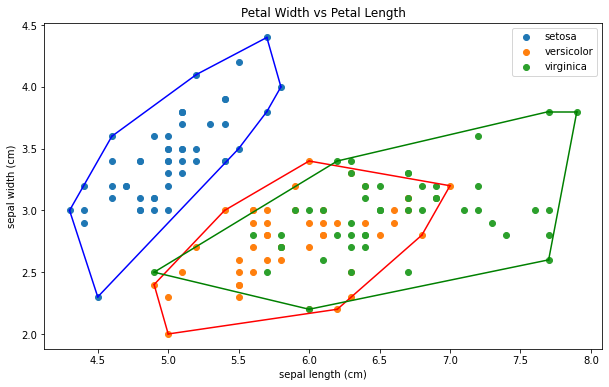

In [2]:
#DATASET IRIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print("Besar data: ",df.shape)
df.head()

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    bucketcop = bucket.copy()
    sortedBucket = sorted(bucket, key=lambda k : [k[0],k[1]])
    sortedBucket = np.matrix(sortedBucket)
    hull = myConvexHull(sortedBucket)
    plt.scatter(bucketcop[:, 0], bucketcop[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot([simplex[0][0],simplex[1][0]], [simplex[0][1],simplex[1][1]], colors[i])
plt.legend()

Besar data:  (178, 14)


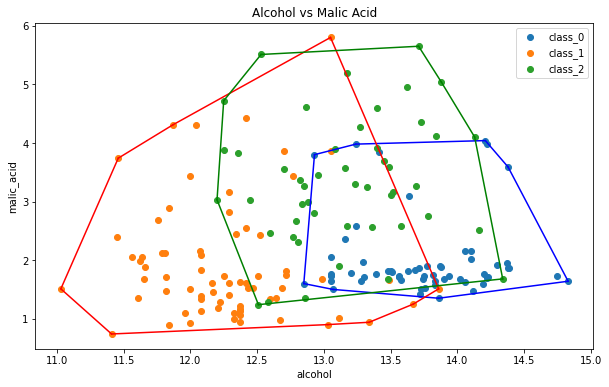

In [3]:
#DATASET WINE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data2 = datasets.load_wine()
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['Target'] = pd.DataFrame(data2.target)
print("Besar data: ",df2.shape)
df2.head()


plt.figure(figsize = (10, 6))
colors = ['b','r','g','y']
plt.title('Alcohol vs Malic Acid')
plt.xlabel(data2.feature_names[0])
plt.ylabel(data2.feature_names[1])
for i in range(len(data2.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    bucketcop = bucket.copy()
    sortedBucket = sorted(bucket, key=lambda k : [k[0],k[1]])
    sortedBucket = np.matrix(sortedBucket)
    hull = myConvexHull(sortedBucket)
    plt.scatter(bucketcop[:, 0], bucketcop[:, 1], label=data2.target_names[i])
    for simplex in hull:
        plt.plot([simplex[0][0],simplex[1][0]], [simplex[0][1],simplex[1][1]], colors[i%4])
plt.legend()

Besar data:  (1797, 65)


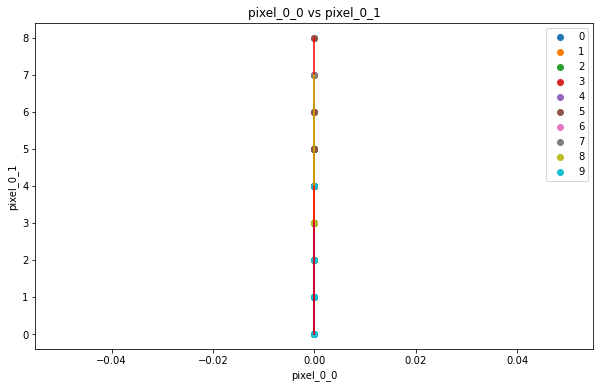

In [4]:
#DATASET DIGITS
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data3 = datasets.load_digits()
df3 = pd.DataFrame(data3.data, columns=data3.feature_names)
df3['Target'] = pd.DataFrame(data3.target)
print("Besar data: ",df3.shape)
df3.head()


plt.figure(figsize = (10, 6))
colors = ['b','r','g','y']
plt.title('pixel_0_0 vs pixel_0_1')
plt.xlabel(data3.feature_names[0])
plt.ylabel(data3.feature_names[1])
for i in range(len(data3.target_names)):
    bucket = df3[df3['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    bucketcop = bucket.copy()
    sortedBucket = sorted(bucket, key=lambda k : [k[0],k[1]])
    sortedBucket = np.matrix(sortedBucket)
    hull = myConvexHull(sortedBucket)
    plt.scatter(bucketcop[:, 0], bucketcop[:, 1], label=data3.target_names[i])
    for simplex in hull:
        plt.plot([simplex[0][0],simplex[1][0]], [simplex[0][1],simplex[1][1]], colors[i%4])
plt.legend()

Besar data:  (569, 31)


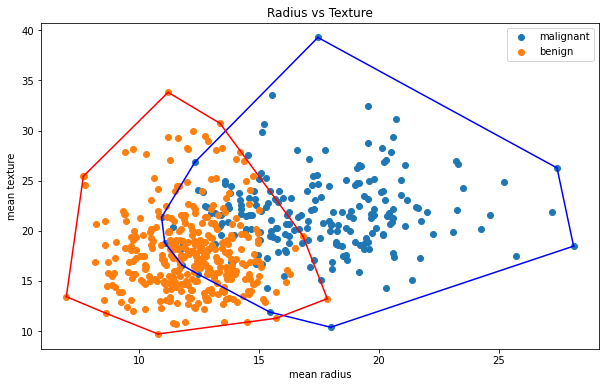

In [5]:
#DATASET BREAST CANCER
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data4 = datasets.load_breast_cancer()
df4 = pd.DataFrame(data4.data, columns=data4.feature_names)
df4['Target'] = pd.DataFrame(data4.target)
print("Besar data: ",df4.shape)
df4.head()


plt.figure(figsize = (10, 6))
colors = ['b','r','g','y']
plt.title('Radius vs Texture')
plt.xlabel(data4.feature_names[0])
plt.ylabel(data4.feature_names[1])
for i in range(len(data4.target_names)):
    bucket = df4[df4['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    bucketcop = bucket.copy()
    sortedBucket = sorted(bucket, key=lambda k : [k[0],k[1]])
    sortedBucket = np.matrix(sortedBucket)
    hull = myConvexHull(sortedBucket)
    plt.scatter(bucketcop[:, 0], bucketcop[:, 1], label=data4.target_names[i])
    for simplex in hull:
        plt.plot([simplex[0][0],simplex[1][0]], [simplex[0][1],simplex[1][1]], colors[i%4])
plt.legend()